<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Movie_shooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo



In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [2]:
KOLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
            "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
            "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
            "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
            "#8c6d31", "#9c9ede", "#637939", "#e7cb94", "#b5cf6b",
            "#cedb9c", "#c7c7c7", "#bd9e39", "#e7969c", "#7b4173"]

In [3]:
data = {
    "Patt": [26481, 2, 5, 7, 10, 11, 13, 15, 17],
    "Casta": [25043, 4, 7, 9, 10, 13, 16, 19],
    "Scolaro": [30310, 3, 6, 9, 10, 14, 16, 17, 18],
    "Murphy": [4085, 2, 8, 12, 13, 15],
    "Brown": [7562, 2, 3, 12, 17],
    "Hacket": [9381, 1, 2, 12, 13, 18],
    "Anderson": [8770, 5, 6, 14],
    "McDougal": [5788, 3, 5, 6, 9, 10, 12, 15, 16, 18],
    "Mercer": [7423, 3, 4, 5, 8, 9, 16],
    "Spring": [3303, 5, 6],
    "Thompson": [9593, 6, 9, 12, 15, 18]
}
df_cost, df_scene= {}, {}
for k,lis in data.items():
  df_cost[k] = lis[0]
  df_scene[k] = lis[1:]

scenes = [s for s in range(1,20)]
actors = [a for a in df_cost.keys()]
days = [d for d in range(1,5)]


scene_dic = {s:[] for s in scenes}
for k,l_scene in df_scene.items():
  for l in l_scene:
    scene_dic[l]+=[k]
scene_dic

{1: ['Hacket'],
 2: ['Patt', 'Murphy', 'Brown', 'Hacket'],
 3: ['Scolaro', 'Brown', 'McDougal', 'Mercer'],
 4: ['Casta', 'Mercer'],
 5: ['Patt', 'Anderson', 'McDougal', 'Mercer', 'Spring'],
 6: ['Scolaro', 'Anderson', 'McDougal', 'Spring', 'Thompson'],
 7: ['Patt', 'Casta'],
 8: ['Murphy', 'Mercer'],
 9: ['Casta', 'Scolaro', 'McDougal', 'Mercer', 'Thompson'],
 10: ['Patt', 'Casta', 'Scolaro', 'McDougal'],
 11: ['Patt'],
 12: ['Murphy', 'Brown', 'Hacket', 'McDougal', 'Thompson'],
 13: ['Patt', 'Casta', 'Murphy', 'Hacket'],
 14: ['Scolaro', 'Anderson'],
 15: ['Patt', 'Murphy', 'McDougal', 'Thompson'],
 16: ['Casta', 'Scolaro', 'McDougal', 'Mercer'],
 17: ['Patt', 'Scolaro', 'Brown'],
 18: ['Scolaro', 'Hacket', 'McDougal', 'Thompson'],
 19: ['Casta']}

In [4]:
def plot_results():
  plt.figure(figsize=(8,5))
  results_day = {}
  all = []
  allocated =[]
  for d in days:
    all_scenes = [s for s in scenes if solver.Value(U[s,d])>0 ]
    results_day[d] = all_scenes
    x= 8*(d-1)-0.7
    plt.gca().add_patch(Rectangle((x,-0.5), 5,11,linewidth=1,edgecolor='k',facecolor='grey', alpha =0.2))
    for s in all_scenes:
      x,y = 8*(d-1)+0.9*all_scenes.index(s), 5
      today_actors= scene_dic[s]
      for actor in today_actors:
          y = actors.index(actor)
          plt.scatter(x,y, s= 90, edgecolors= 'k', c = KOLORS[s], zorder =2)
          all.append(x)
          allocated.append(s)

  for (s,d), v in U.items():
      if solver.Value(v)>0:
        x,y = s,d
  plt.yticks(range(len(actors)), actors, fontweight='bold')
  plt.xticks(all,allocated)
  plt.grid(all)
  plt.title(' Scenes ')
  plt.tight_layout()
  plt.show()


OPTIMAL
334144.0


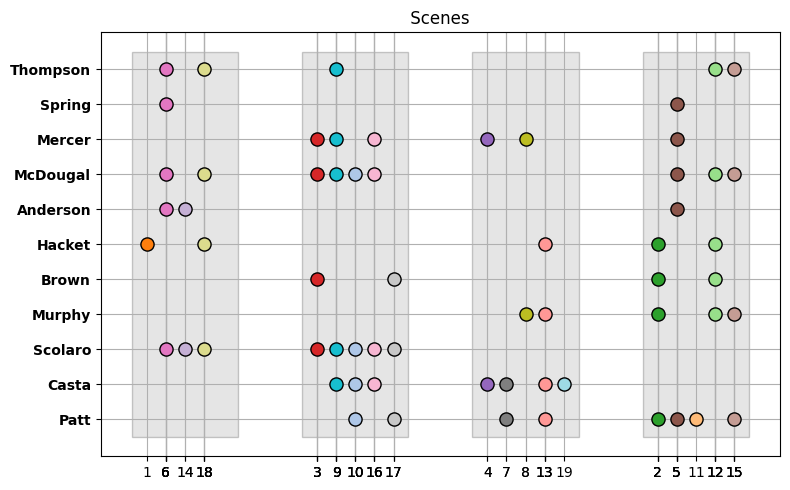

In [5]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)
for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )
expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

## Plot function

##Symmetry Breaking

OPTIMAL
334144.0


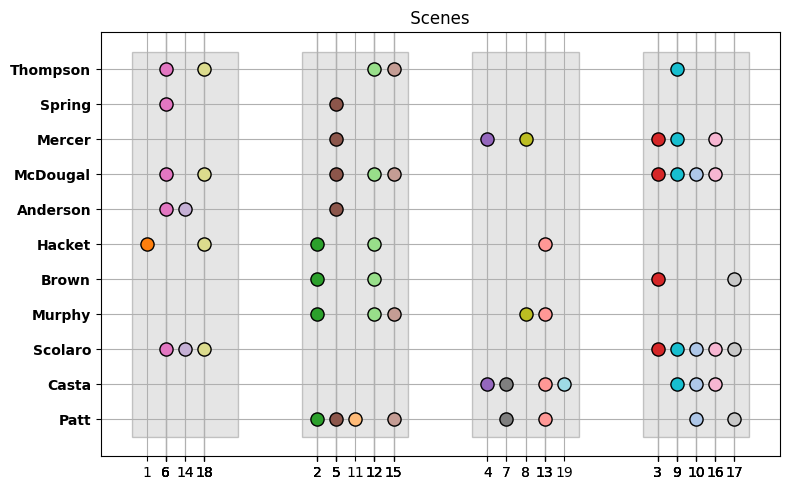

In [6]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)
  if d+1 in days:
    expressions_scen = [s*U[s,d] for s in scenes ]
    expressions_scen2 = [s*U[s,d+1] for s in scenes ]
    model.Add( sum(expressions_scen) <= sum(expressions_scen2))

for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# **Hacket** and **Spring** can't be on the same day

OPTIMAL
343256.0


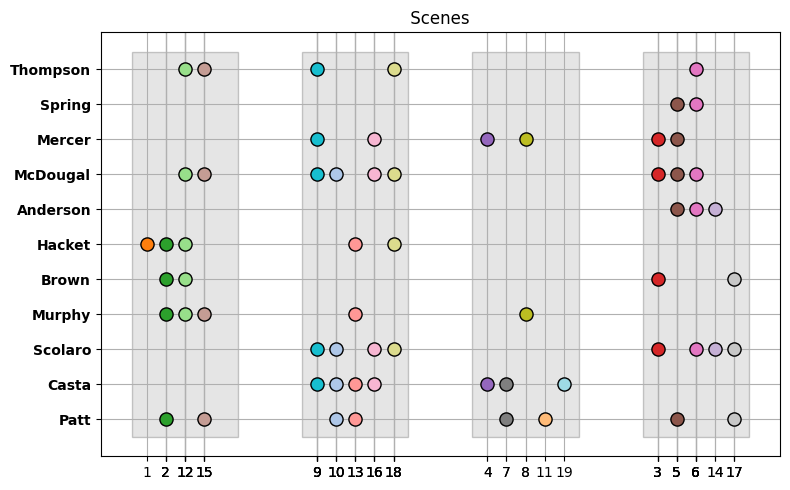

In [7]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)
  model.Add(AC['Hacket',d]+AC['Spring',d] <= 1)

for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# *Scene* 3 should be taken before 9

OPTIMAL
336410.0


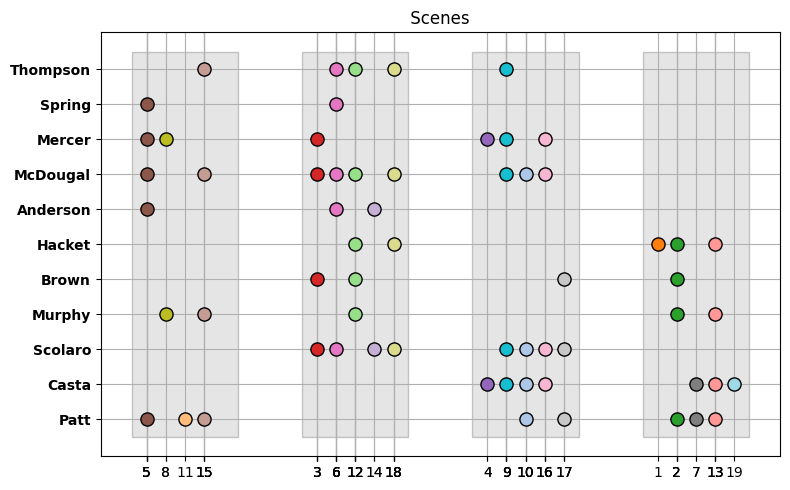

In [8]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)



model.Add( sum(d*U[3,d] for d in days) < sum(d*U[9,d] for d in days) )

for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# *Scene* 3 should be taken before 9 in two consecutive days

OPTIMAL
336410.0


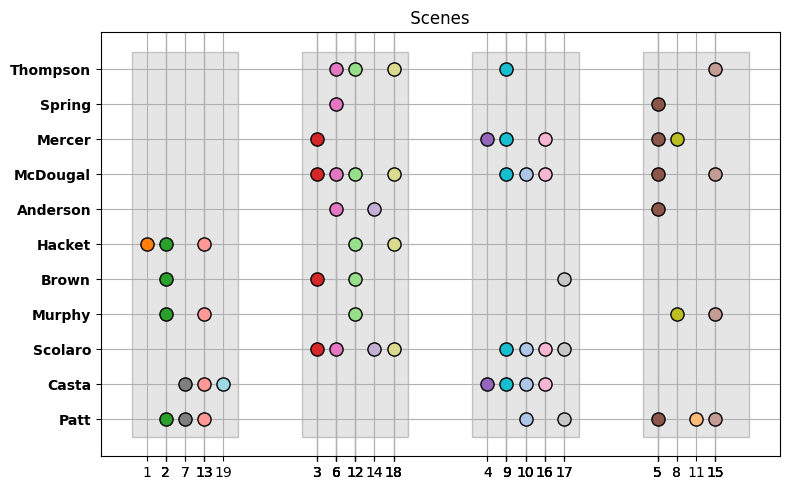

In [9]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)

model.Add( -sum(d*U[3,d] for d in days)  +  sum(d*U[9,d] for d in days) ==1 )
for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# Max Scenes per day for each actor/actress is 3

OPTIMAL
367185.0


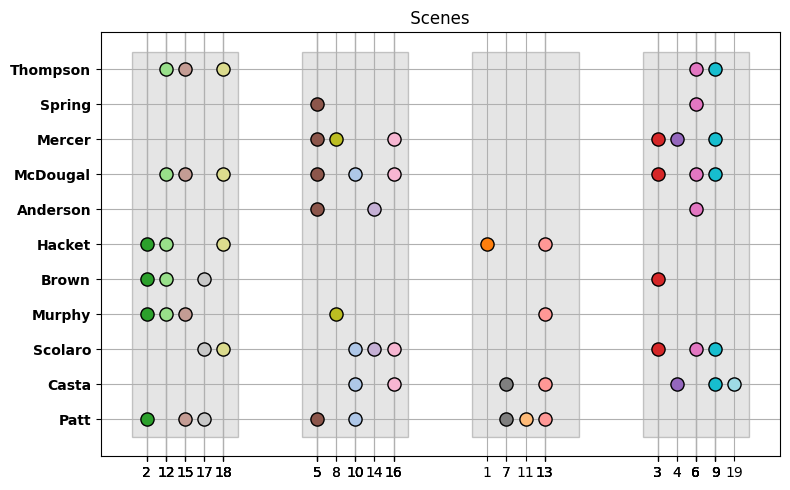

In [10]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)

  for a in actors:
    scens_assigned_to_actor = [U[s,d] for s in scenes if a in scene_dic[s]]
    model.Add(sum(scens_assigned_to_actor) <= 3) # max scen per actor/actress is 3

for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# Max 7 actors on each day

OPTIMAL
348171.0


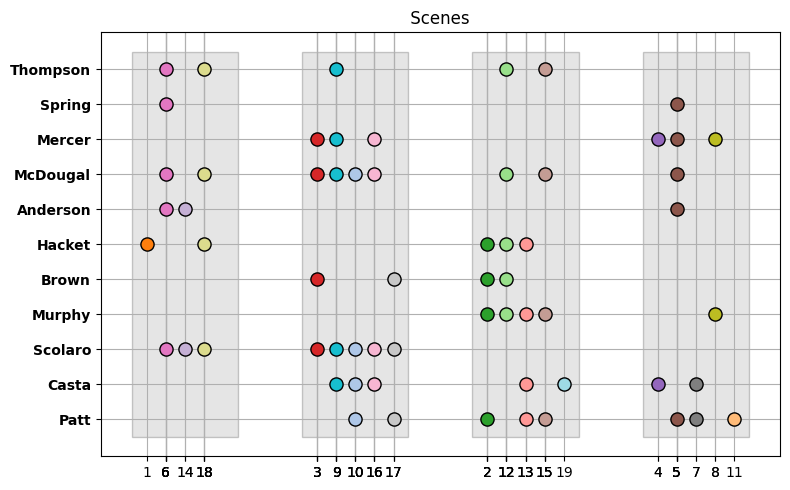

In [11]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)

  expressions_actors = [AC[a,d] for a in actors ]
  model.Add(sum(expressions_actors) <= 7)



for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 60
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# max shooting days / actor is 3 and max actors per day is 7

OPTIMAL
336410.0


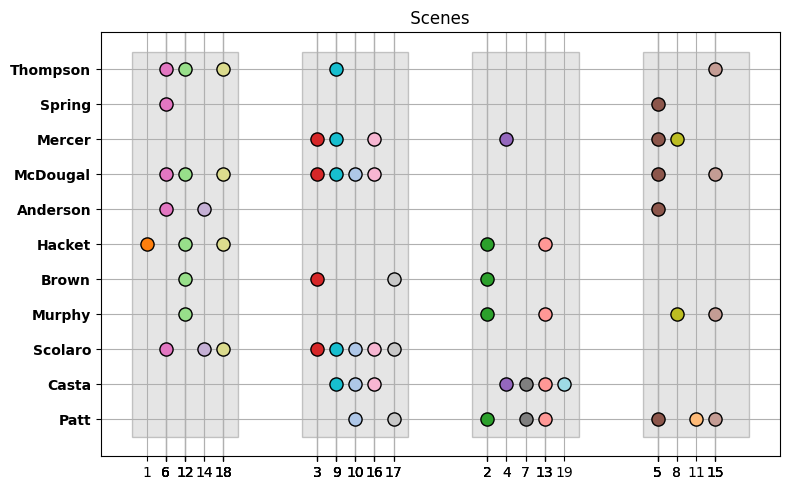

In [19]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)

  expressions_actors = [AC[a,d] for a in actors ]
  model.Add(sum(expressions_actors) <= 8)

for a in actors:
  expressions_actors = [AC[a,d] for d in days ]
  model.Add(sum(expressions_actors) <= 3)


for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 180
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()

# Spring is absent on Day 1 and Day 2 , Murphy on day 3

OPTIMAL
347114.0


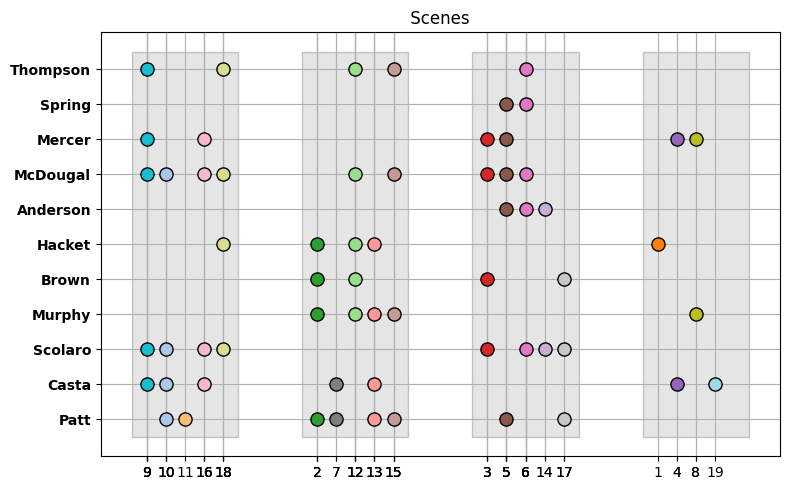

In [22]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()
U = {(s,d):model.NewBoolVar(f"scen_day_{s}_{d}")  for s in scenes for d in days}
AC = {(a,d):model.NewBoolVar(f"actor_day_{a}_{d}")  for a in actors for d in days}
for s in scenes:
  expressions = [U[s,d] for d in days ]
  model.AddExactlyOne(expressions)
for d in days:
  expressions = [U[s,d] for s in scenes ]
  model.Add(sum(expressions) <= 5)

  expressions_actors = [AC[a,d] for a in actors ]
  model.Add(sum(expressions_actors) <= 8)

for a in actors:
  expressions_actors = [AC[a,d] for d in days ]
  model.Add(sum(expressions_actors) <= 3)


for (s,d),v in U.items():
  for actor in scene_dic[s]:
    model.Add(v<=AC[actor,d] )


model.Add(AC['Spring',1]== 0 )
model.Add(AC['Spring',2]== 0 )
model.Add(AC['Murphy',3]== 0 )

expressions = [v*df_cost[actor] for (actor,d),v in AC.items()]
model.Minimize(sum(expressions))
solver.parameters.max_time_in_seconds = 180
status = solver.Solve(model)
if status == cp_model.OPTIMAL:
  print("OPTIMAL")
elif status == cp_model.FEASIBLE:
  print("FEASIBLE")
elif status == cp_model.INFEASIBLE:
  print("INFEASIBLE")
  print("FEASIBLE")
elif status == cp_model.UNKNOWN:
  print("UNKNOWN")
print(solver.ObjectiveValue())
plot_results()